# 2023 Towson University Data Analytics Competition



### Objectives
##### 1. Employee Utilization (eu)
- Group & sort clients by eu (high to low)
- Group & sort employees by eu (high to low)
- Filter
     
##### 2. Profitability
- Group & sort clients by total amount 
- Group and sort profitability by year and quarter

In [ ]:
import time
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('SCHGROUP_data.csv')  
df.columns

In [ ]:
hours = df[["EmployeeId", "ClientNum", "BillType", "Hours"]]
employee_ids = list(hours.EmployeeId.unique())
client_ids =list(hours.ClientNum.unique())

### Utilization Rate
 

In [ ]:
def get_rates(field):
    if field == "employee_id":
        ids = list(hours.EmployeeId.unique())
        field = "EmployeeId"
    elif field == "client_id":
        ids =list(hours.ClientNum.unique())
        field = "ClientNum"
    util_rates = []
    for i in tqdm(ids):
        df = hours.loc[hours[field]==i]
        billable = float(sum(list(df.loc[df['BillType'] == 'Billable']["Hours"])))
        nonbillable = float(sum(list(df.loc[df['BillType'] == 'NonBillable']["Hours"])))
        total = billable + nonbillable

        try:
            data = {field:i,
                    "billable":billable,
                    "total":total,
                    "ratio": float(round(((billable/total) * 100),2))}
            util_rates.append(data)
        except:
            data["billable_ratio"]=0
    new_df = pd.DataFrame(util_rates)
    return new_df

### Employee Utilization

In [ ]:
path = "/Users/Yousefmacer/Github/sch-group/ouput/employee_rates.csv"
e_rates = get_rates("employee_id")
#e_rates.to_csv(path, index=False)

### Profitability

In [61]:
def return_total(in_put):
    filtered_list = []
    amounts = in_put.split("$")
    for value in amounts:
        v= value.strip()
        try:filtered_list.append(float(v))
        except:pass
    total = round(sum(filtered_list),2)
    return total

In [60]:
grouped = df.groupby('ClientNum')
total_amounts = grouped['TotalAmount'].sum()
client_totals = []
for client_num, total_amount in total_amounts.iteritems():
    total = return_total(total_amount)
    client_totals.append({"ClientNum":client_num, "Profit": total})
client_totals = pd.DataFrame(client_totals)
path = "/Users/Yousefmacer/Github/sch-group/ouput/client_totals.csv"
client_totals.to_csv(path, index=False)
client_totals

,ClientNum,Profit
0,CLT1000,6728.63
1,CLT1001,6817.12
2,CLT1002,19634.80
3,CLT1003,5710.54
4,CLT1004,20823.96
...,...,...
3044,CLT4044,8468.00
3045,CLT4045,11360.46
3046,CLT4046,290.92
3047,CLT4047,58319.97


### Find the total + average profitability for each quarter of each year 

In [ ]:
# convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [65]:
q1 = pd.date_range(start='2019-01-01', end='2019-03-31')
q2 = pd.date_range(start='2019-04-01', end='2019-06-30')
q3 = pd.date_range(start='2019-07-01', end='2019-09-30')
q4 = pd.date_range(start='2019-10-01', end='2019-12-31')

# filter the dataframe for each quarter
q1_2019 = df[df['Date'].isin(q1)].sort_values(by='Date', ascending=True)
q2_2019 = df[df['Date'].isin(q2)].sort_values(by='Date', ascending=True)
q3_2019 = df[df['Date'].isin(q3)].sort_values(by='Date', ascending=True)
q4_2019 = df[df['Date'].isin(q4)].sort_values(by='Date', ascending=True)

q1_2019_profit = q1_2019['TotalAmount'].sum()
q1_2019_profit = return_total(q1_2019_profit)

q2_2019_profit = q2_2019['TotalAmount'].sum()
q2_2019_profit = return_total(q2_2019_profit)

q3_2019_profit = q3_2019['TotalAmount'].sum()
q3_2019_profit = return_total(q3_2019_profit)

q4_2019_profit = q4_2019['TotalAmount'].sum()
q4_2019_profit = return_total(q4_2019_profit)


9837441.2

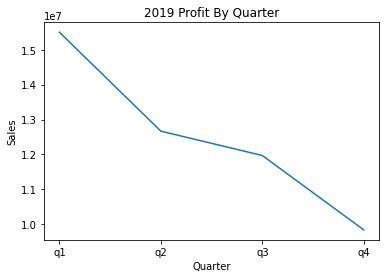

[15499297.16, 12665752.6, 11968999.14, 9837441.2]


In [66]:
x = ['q1', 'q2', 'q3', 'q4']
y = [q1_2019_profit, q2_2019_profit, q3_2019_profit, q4_2019_profit]

plt.plot(x, y)

plt.title('2019 Profit By Quarter')
plt.xlabel('Quarter')
plt.ylabel('Sales')

plt.show()
print(y)

In [56]:
q1 = pd.date_range(start='2020-01-01', end='2020-03-31')
q2 = pd.date_range(start='2020-04-01', end='2020-06-30')
q3 = pd.date_range(start='2020-07-01', end='2020-09-30')
q4 = pd.date_range(start='2020-10-01', end='2020-12-31')

# filter the dataframe for each quarter
q1_2020 = df[df['Date'].isin(q1)].sort_values(by='Date', ascending=True)
q2_2020 = df[df['Date'].isin(q2)].sort_values(by='Date', ascending=True)
q3_2020 = df[df['Date'].isin(q3)].sort_values(by='Date', ascending=True)
q4_2020 = df[df['Date'].isin(q4)].sort_values(by='Date', ascending=True)

q1_2020_profit = q1_2020['TotalAmount'].sum()
q1_2020_profit = return_total(q1_2019_profit)

q2_2020_profit = q2_2020['TotalAmount'].sum()
q2_2020_profit = return_total(q2_2019_profit)

q3_2020_profit = q3_2020['TotalAmount'].sum()
q3_2020_profit = return_total(q3_2019_profit)

q4_2020_profit = q4_2020['TotalAmount'].sum()
q4_2020_profit = return_total(q4_2019_profit)


In [ ]:
q1 = pd.date_range(start='2021-01-01', end='2021-03-31')
q2 = pd.date_range(start='2021-04-01', end='2021-06-30')
q3 = pd.date_range(start='2021-07-01', end='2021-09-30')
q4 = pd.date_range(start='2021-10-01', end='2021-12-31')

# filter the dataframe for each quarter
q1_2021 = df[df['Date'].isin(q1)].sort_values(by='Date', ascending=True)
q2_2021 = df[df['Date'].isin(q2)].sort_values(by='Date', ascending=True)
q3_2021 = df[df['Date'].isin(q3)].sort_values(by='Date', ascending=True)
q4_2021 = df[df['Date'].isin(q4)].sort_values(by='Date', ascending=True)
q1_2021